# Trabalho 2 de Cálculo numérico

In [1]:
#BIBLIOTECAS UTILIZADAS
import numpy as np
import matplotlib.pylab as plt
from scipy import sparse
from numpy import dot
import scipy as scp
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import time as time
from scipy.stats import ortho_group
from matplotlib import cm
import matplotlib.animation as animation

## Exercício 1

Considerar uma membrana quadrada de lados L1 = L2 =1, com<br>
espesura $e = 1$, densidade $\rho = 1$ e tensão $\sigma = 1$.<br>

Calcular as primeiras 4 frequências de oscilação da membrana como função do tamanho da grade. <br>
Tomar $N1 = N2 = 11, 21, 31, 41, 51, 61, 81, 101$.<br>

Usar a função scipy.sparse.linalg.eigsh, especificando $k = 4$. <br>
Mostrar os resultados em forma de gráfico e tabela.<br>

In [3]:
def ij2n (i, j, N):
    return i + j*N

def BuildMatrizesEigen(N1, N2, sigma, rho, e, delta):
    nunk = N1*N2

    # Stiffness matrix K: Build it as a sparse matrix 
    d1 = 4.0*np.ones(nunk)
    d2 = -np.ones(nunk-1)
    d3 = -np.ones(nunk-N1)
    K = (sigma/delta**2)*scp.sparse.diags([d3, d2, d1, d2, d3], [-N1, -1, 0, 1, N1], format='csr')

    # Force the eigenvalues associated to boundary points 
    # to be a big number as compared to fundamental modes
    big_number = 10000
    Iden = big_number*scp.sparse.identity(nunk, format='csr')

    # Lados verticais
    for k in range(0,N2):
        Ic = ij2n(0,k,N1) # Left
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

        Ic = ij2n(N1-1,k,N1) # Right
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]
        
    # Lados horizontais
    for k in range(0,N1):
        Ic = ij2n(k,0,N1) # Bottom
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

        Ic = ij2n(k,N2-1,N1) # Top
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

    # Mass matrix: Simple case, multiple of identity
    M = rho*e*scp.sparse.identity(nunk, format='csr')
    
    return K, M  

In [46]:
N=[11, 21, 31, 41, 51, 61, 81, 101]    #TAMANHO DAS GRADES ("precisão")
freqNum=4                              #NUMERO DE FREQUENCIAS QUE SERÃO CALCULADAS

Freq=np.zeros(shape=(len(N),freqNum))  #MATRIZ QUE VAI ARMAZENAR AS FREQUENCIAS DE ACORDO COM O TAMANHO DE GRADE

L1=L2=1         #DISCRETIZAÇÕES DO PROBLEMA
sigma=rho=e=1

for i in range (len(N)):

    delta=L1/(N[i]-1)   #CALCULO DO DELTA ENTRE CADA PONTO DA GRADE
    K,M=BuildMatrizesEigen(N[i], N[i], sigma, rho, e, delta) #MONTANDO AS MATRIZES KM

    Lam, Q = scp.sparse.linalg.eigsh(K, k=freqNum, M=M, which='SM') #CALCULO DAS 4 PRIMEIRAS FREQUENCIAS DE OSCILACAO
    omegas = np.sqrt(Lam)

    for j in range (freqNum): #ARMAZENANDO AS FREQUENCIAS ENCONTRADAS
        Freq[i][j]=omegas[j]


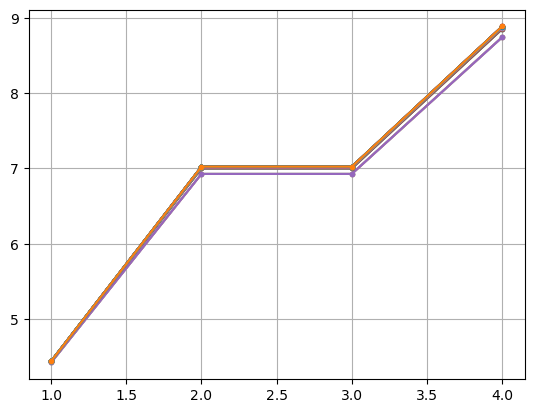

In [97]:
N=[1,2,3,4]
for i in range (freqNum):
    plt.plot(N[:],Freq.T,marker = '.')
plt.grid()
plt.show()


## Exercício 2
Repetir o exercício anterior, mas agora<br>
para uma membrana de forma triangular.<br>